*Data processing and cleansing-remove outliers and missing values

In [1]:
#importing libraries to import data into the project
import pandas as pd
import numpy as np

In [2]:
# Read the dataset into a DataFrame
weather_df = pd.read_csv('weatherAUS.csv')
weather_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,6/21/2017,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,6/22/2017,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,6/23/2017,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,6/24/2017,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
print(weather_df.columns)

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


In [4]:
# Set 'Date' column as index
weather_df['Date'] = pd.to_datetime(weather_df['Date'])
weather_df.set_index('Date', inplace=True)
weather_df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


In [5]:
important_columns = ['Location','MinTemp','MaxTemp','Rainfall','RainToday','RainTomorrow']  
# Add the names of the important columns
weather_df = weather_df[important_columns].copy()
weather_df

,Location,MinTemp,MaxTemp,Rainfall,RainToday,RainTomorrow
Date,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,No,No
2008-12-02,Albury,7.4,25.1,0.0,No,No
2008-12-03,Albury,12.9,25.7,0.0,No,No
2008-12-04,Albury,9.2,28.0,0.0,No,No
2008-12-05,Albury,17.5,32.3,1.0,No,No
...,...,...,...,...,...,...
2017-06-21,Uluru,2.8,23.4,0.0,No,No
2017-06-22,Uluru,3.6,25.3,0.0,No,No
2017-06-23,Uluru,5.4,26.9,0.0,No,No


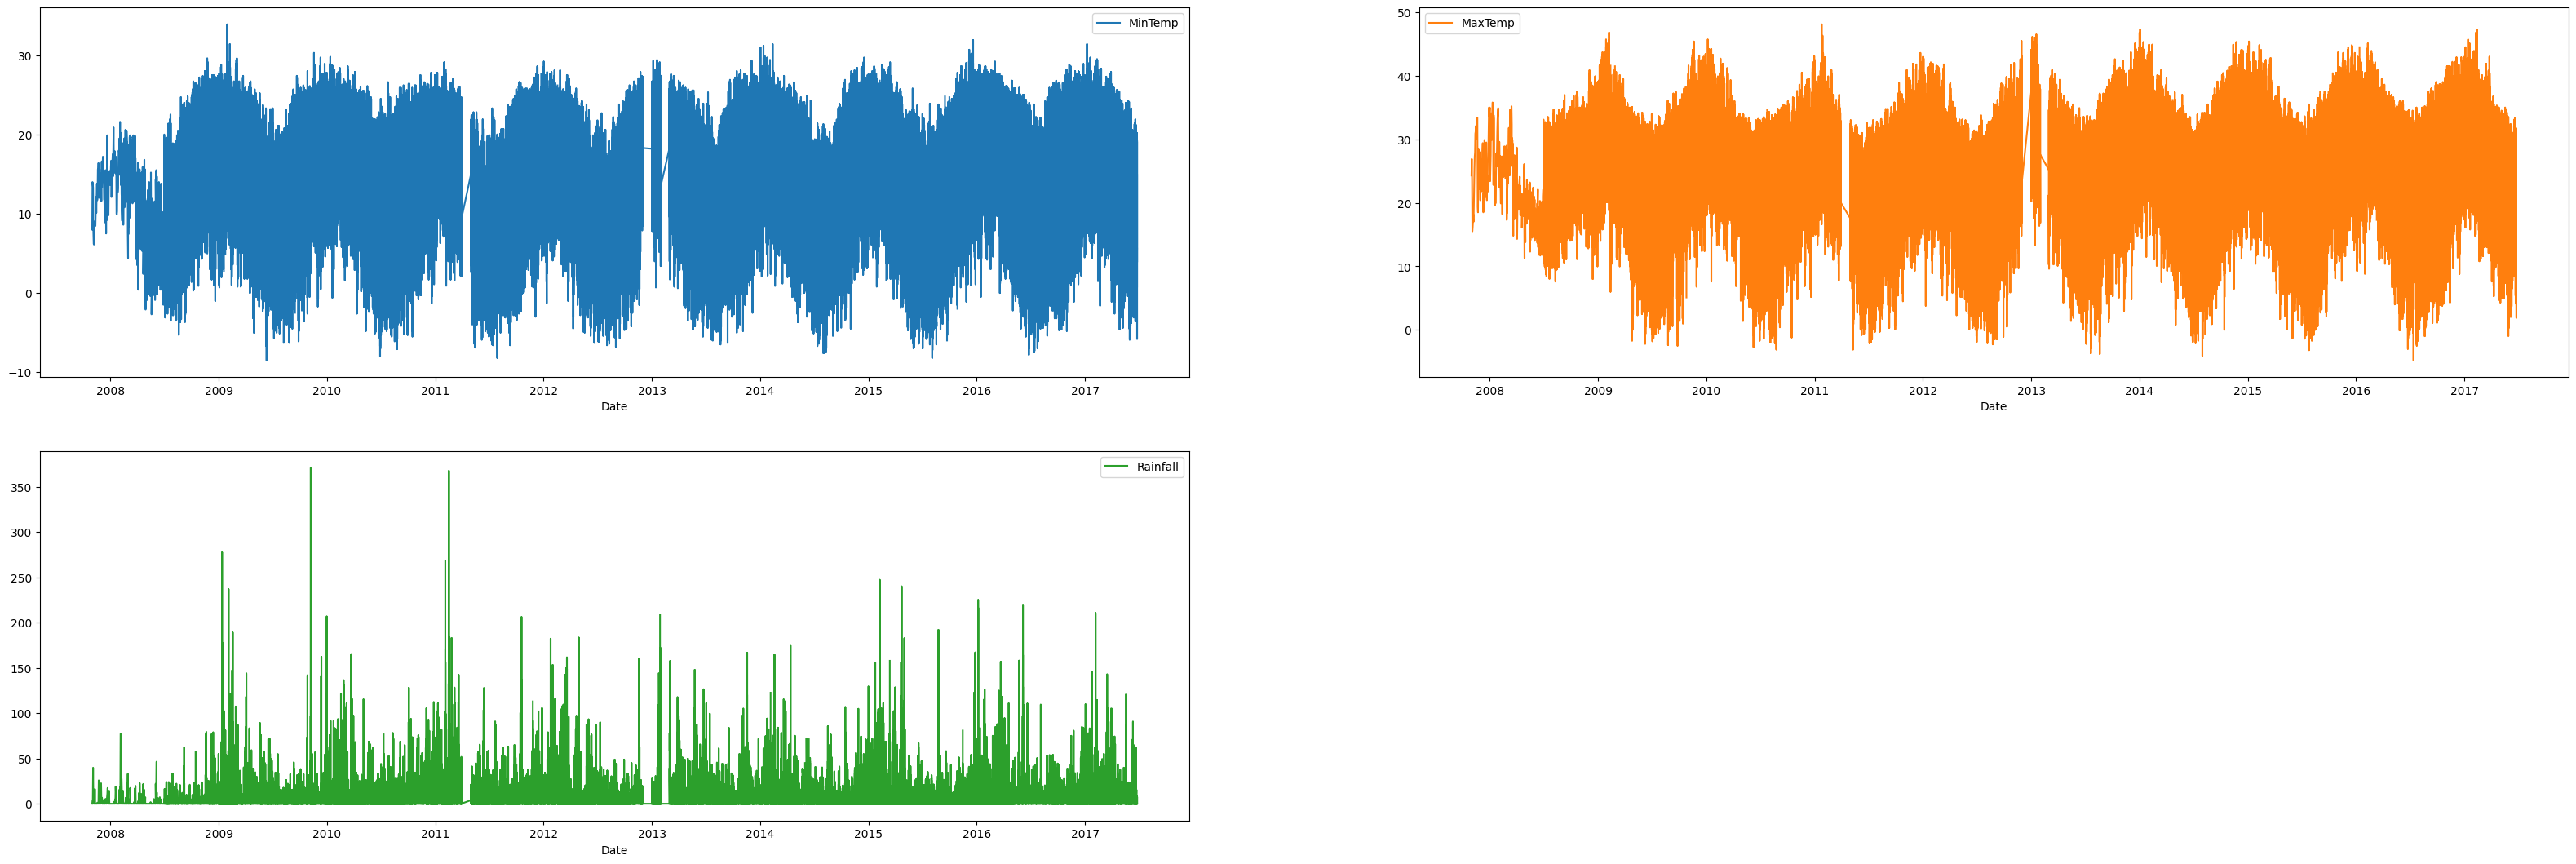

In [6]:
import matplotlib.pyplot as plt
weather_df[important_columns].plot(subplots=True, layout=(3, 2), figsize=(40, 20), sharex=False)
plt.show()

In [7]:
# Check the percentage of missing values in each column
missing_percentage = weather_df.isnull().mean() * 100
print("Missing Values Percentage:\n", missing_percentage)

Missing Values Percentage:
 Location        0.000000
MinTemp         1.020899
MaxTemp         0.866905
Rainfall        2.241853
RainToday       2.241853
RainTomorrow    2.245978
dtype: float64


In [8]:
# Dropping rows with missing values in remaining columns
weather_df = weather_df.dropna()
weather_df

,Location,MinTemp,MaxTemp,Rainfall,RainToday,RainTomorrow
Date,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,No,No
2008-12-02,Albury,7.4,25.1,0.0,No,No
2008-12-03,Albury,12.9,25.7,0.0,No,No
2008-12-04,Albury,9.2,28.0,0.0,No,No
2008-12-05,Albury,17.5,32.3,1.0,No,No
...,...,...,...,...,...,...
2017-06-20,Uluru,3.5,21.8,0.0,No,No
2017-06-21,Uluru,2.8,23.4,0.0,No,No
2017-06-22,Uluru,3.6,25.3,0.0,No,No


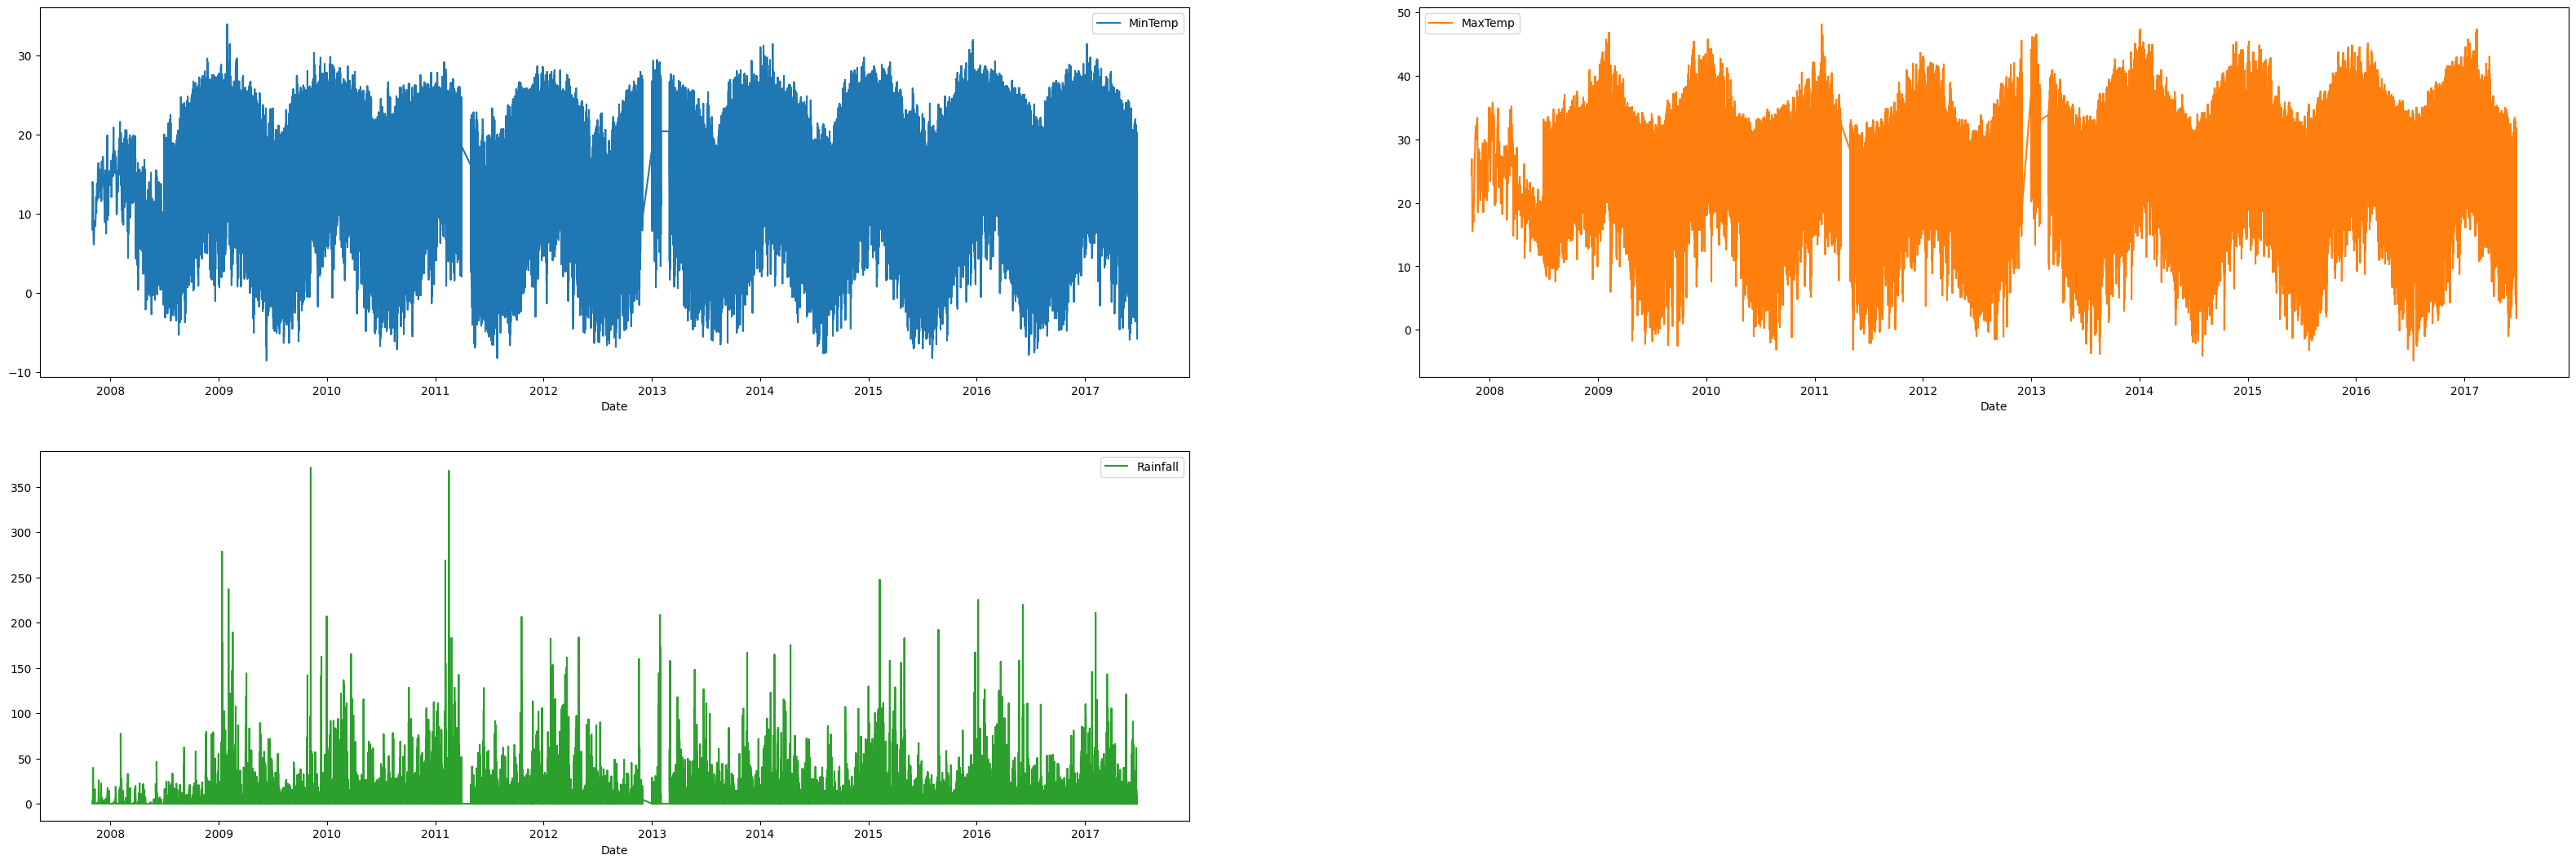

In [9]:
weather_df[important_columns].plot(subplots=True, layout=(3, 2), figsize=(40, 20), sharex=False)
plt.show()

In [10]:
z_scores = (weather_df - weather_df.mean(numeric_only=True)) / weather_df.std(numeric_only=True)
threshold = 3  # Set your own threshold (e.g., 3)
outliers_mask = (np.abs(z_scores) > threshold).any(axis=1)
weather_df_no_outliers = weather_df[~outliers_mask]
#making the database to its no utliers version
weather_df = weather_df_no_outliers
weather_df

,Location,MinTemp,MaxTemp,Rainfall,RainToday,RainTomorrow
Date,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,No,No
2008-12-02,Albury,7.4,25.1,0.0,No,No
2008-12-03,Albury,12.9,25.7,0.0,No,No
2008-12-04,Albury,9.2,28.0,0.0,No,No
2008-12-05,Albury,17.5,32.3,1.0,No,No
...,...,...,...,...,...,...
2017-06-20,Uluru,3.5,21.8,0.0,No,No
2017-06-21,Uluru,2.8,23.4,0.0,No,No
2017-06-22,Uluru,3.6,25.3,0.0,No,No


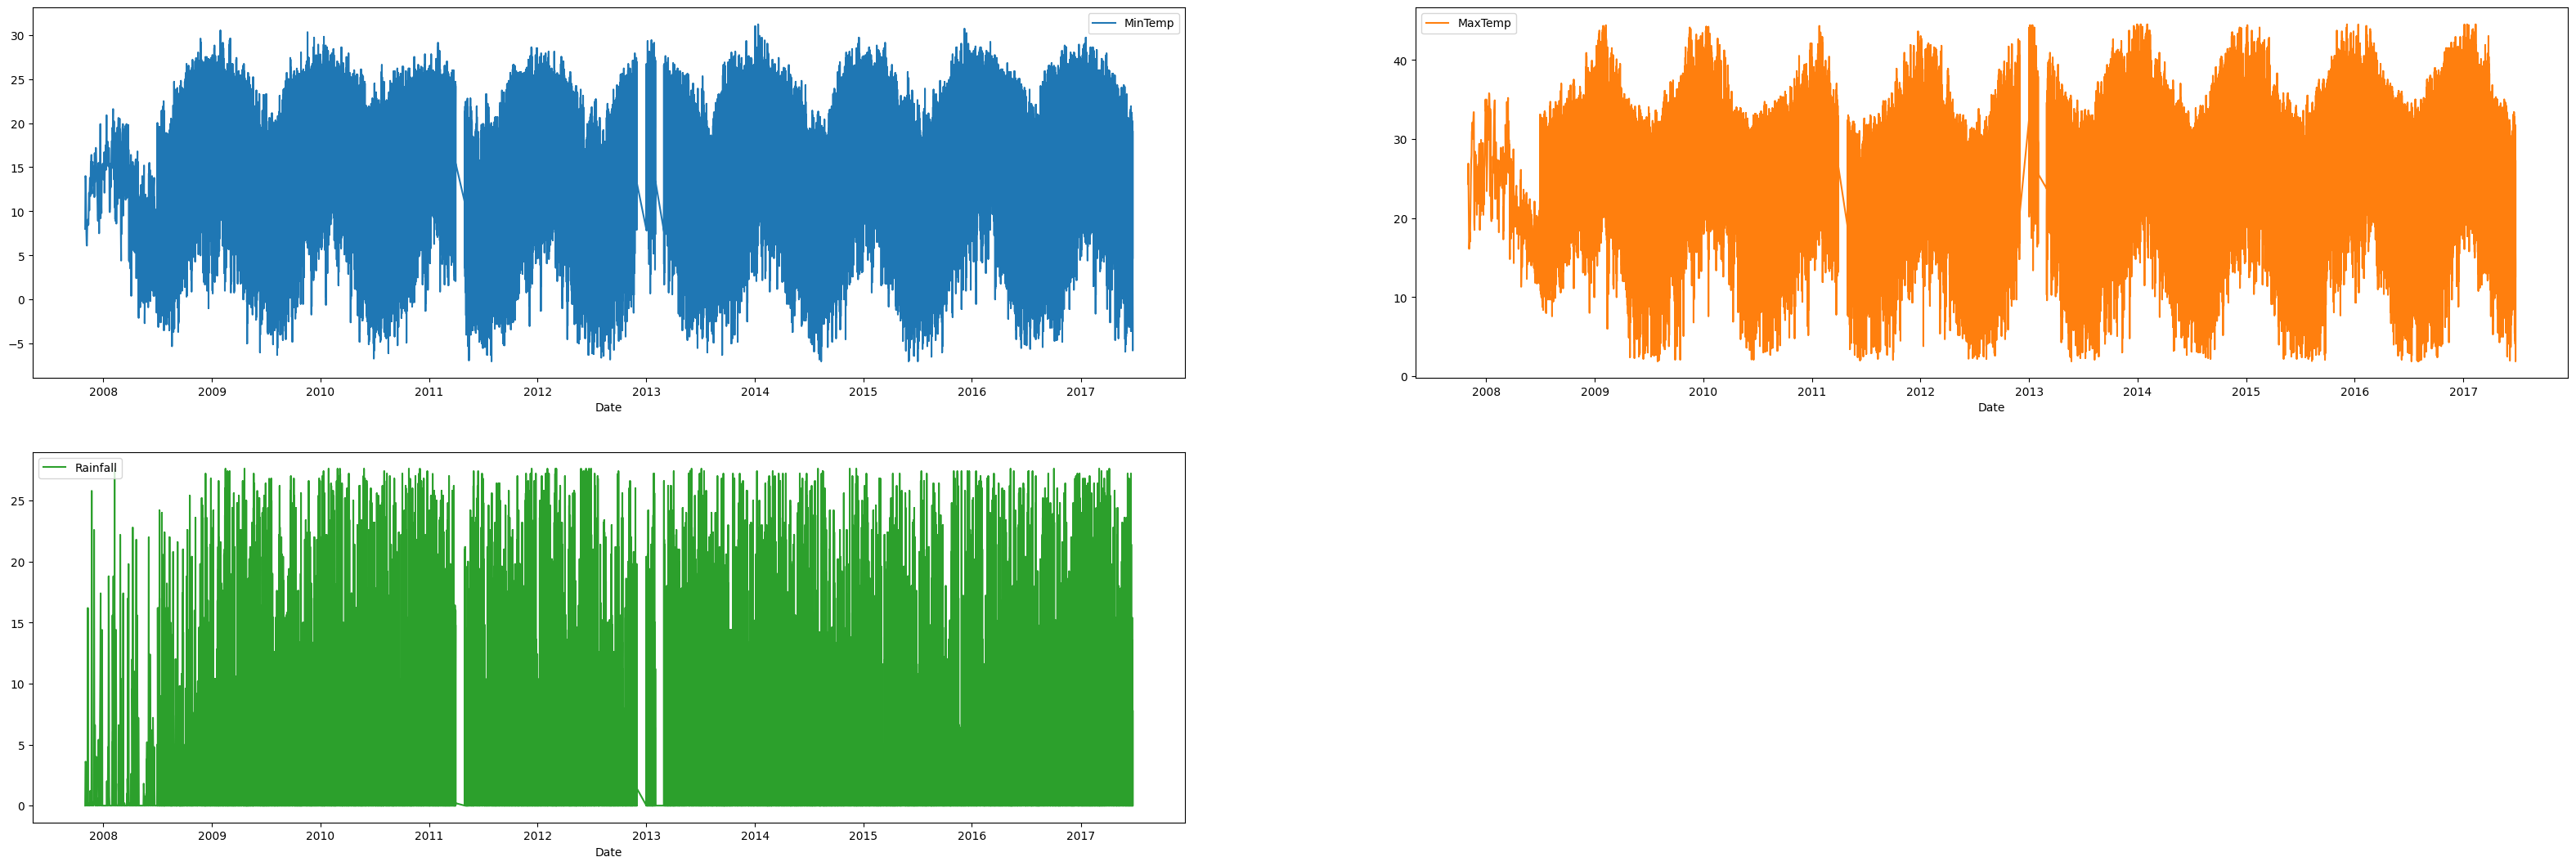

In [11]:
weather_df[important_columns].plot(subplots=True, layout=(3, 2), figsize=(40, 20), sharex=False)
plt.show()

*data transformation-concert non numerical data into numerical data

In [12]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

# Apply label encoding to the 'Location' column
weather_df['Location'] = label_encoder.fit_transform(weather_df['Location'])
weather_df['RainToday'] = label_encoder.fit_transform(weather_df['RainToday'])
weather_df['RainTomorrow'] = label_encoder.fit_transform(weather_df['RainTomorrow'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_21792\4292859971.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df['Location'] = label_encoder.fit_transform(weather_df['Location'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_21792\4292859971.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df['RainToday'] = label_encoder.fit_transform(weather_df['RainToday'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_21792\4292859971.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [13]:
weather_df.head(10)

,Location,MinTemp,MaxTemp,Rainfall,RainToday,RainTomorrow
Date,,,,,,
2008-12-01,2,13.4,22.9,0.6,0,0
2008-12-02,2,7.4,25.1,0.0,0,0
2008-12-03,2,12.9,25.7,0.0,0,0
2008-12-04,2,9.2,28.0,0.0,0,0
2008-12-05,2,17.5,32.3,1.0,0,0
2008-12-06,2,14.6,29.7,0.2,0,0
2008-12-07,2,14.3,25.0,0.0,0,0
2008-12-08,2,7.7,26.7,0.0,0,0
2008-12-09,2,9.7,31.9,0.0,0,1


*Apply algorithm for training model

i am going apply 3 algorithms to each predicting variable (RainToday,RainTomorrow,rainfall)

In [14]:
#importing the libraries for prediction
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

In [ ]:
# Split the dataset into features (X) and target variables (y)
X = weather_df.drop(['Rainfall', 'RainToday', 'RainTomorrow'], axis=1)
y_rain_today = weather_df['RainToday']
y_rain_tomorrow = weather_df['RainTomorrow']
y_rainfall = weather_df['Rainfall']

In [ ]:
weather_df.dtypes

Location          int32
MinTemp         float64
MaxTemp         float64
Rainfall        float64
RainToday         int32
RainTomorrow      int32
dtype: object

In [ ]:
# Check for missing values in the 'RainToday' column and drop rows with missing values
missing_values = y_rain_today.isnull()
X = X[~missing_values]
y_rain_today = y_rain_today[~missing_values]
y_rain_tomorrow = y_rain_tomorrow[~missing_values]
y_rainfall = y_rainfall[~missing_values]

In [ ]:
# Convert the 'RainToday' column to numeric format
y_rain_today = pd.to_numeric(y_rain_today, errors='coerce')

In [ ]:
# Convert the 'RainTomorrow' column to numeric format
y_rain_tomorrow = pd.to_numeric(y_rain_tomorrow, errors='coerce')

In [ ]:
# Convert the 'Rainfall' column to numeric format
y_rainfall = pd.to_numeric(y_rainfall, errors='coerce')

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train_rain_today, y_test_rain_today, y_train_rain_tomorrow, y_test_rain_tomorrow, y_train_rainfall, y_test_rainfall = train_test_split(X, y_rain_today, y_rain_tomorrow, y_rainfall, test_size=0.2, random_state=42)


In [ ]:
# Check for missing values in the target variable and drop corresponding rows
missing_values = y_train_rain_today.isnull()
X_train = X_train[~missing_values]
y_train_rain_today = y_train_rain_today[~missing_values]

# Random Forest model for RainToday prediction
rf_model_rain_today = RandomForestRegressor()
rf_model_rain_today.fit(X_train, y_train_rain_today)
y_pred_rain_today_rf = rf_model_rain_today.predict(X_test)
mae_rf_rain_today = mean_absolute_error(y_test_rain_today, y_pred_rain_today_rf)


In [ ]:
# XGBoost model for RainToday prediction
xgb_model_rain_today = xgb.XGBRegressor()
xgb_model_rain_today.fit(X_train, y_train_rain_today)
y_pred_rain_today_xgb = xgb_model_rain_today.predict(X_test)
mae_xgb_rain_today = mean_absolute_error(y_test_rain_today, y_pred_rain_today_xgb)


In [ ]:
# LSTM model for RainToday prediction
n_steps = 1
n_features = X.shape[1]
X_train_lstm = X_train.values.reshape((X_train.shape[0], n_steps, n_features))
X_test_lstm = X_test.values.reshape((X_test.shape[0], n_steps, n_features))

lstm_model_rain_today = Sequential()
lstm_model_rain_today.add(LSTM(units=64, activation='relu', input_shape=(n_steps, n_features)))
lstm_model_rain_today.add(Dense(units=1))
lstm_model_rain_today.compile(optimizer='adam', loss='mean_squared_error')
lstm_model_rain_today.fit(X_train_lstm, y_train_rain_today, epochs=10, batch_size=32, verbose=0)
y_pred_rain_today_lstm = lstm_model_rain_today.predict(X_test_lstm).flatten()
mae_lstm_rain_today = mean_absolute_error(y_test_rain_today, y_pred_rain_today_lstm)


859/859 [==============================] - 4s 3ms/step


In [ ]:
# Print the MAE for each algorithm
print("MAE for Random Forest (RainToday):", mae_rf_rain_today)
print("MAE for XGBoost (RainToday):", mae_xgb_rain_today)
print("MAE for LSTM (RainToday):", mae_lstm_rain_today)

MAE for Random Forest (RainToday): 0.2623164713422973
MAE for XGBoost (RainToday): 0.2562161769483526
MAE for LSTM (RainToday): 0.270008639569467


repeat the same for rain tomorrow

In [ ]:
# Check for missing values in the target variable and drop corresponding rows
missing_values = y_train_rain_tomorrow.isnull()
X_train = X_train[~missing_values]
y_train_rain_tomorrow = y_train_rain_tomorrow[~missing_values]


# Random Forest model for RainTomorrow prediction
rf_model_rain_tomorrow = RandomForestRegressor()
rf_model_rain_tomorrow.fit(X_train, y_train_rain_tomorrow)
y_pred_rain_tomorrow_rf = rf_model_rain_tomorrow.predict(X_test)
mae_rf_rain_tomorrow = mean_absolute_error(y_test_rain_tomorrow, y_pred_rain_tomorrow_rf)

In [ ]:
# XGBoost model for RainTomorrow prediction
xgb_model_rain_tomorrow = xgb.XGBRegressor()
xgb_model_rain_tomorrow.fit(X_train, y_train_rain_tomorrow)
y_pred_rain_tomorrow_xgb = xgb_model_rain_tomorrow.predict(X_test)
mae_xgb_rain_tomorrow = mean_absolute_error(y_test_rain_tomorrow, y_pred_rain_tomorrow_xgb)


In [ ]:
# LSTM model for RainTomorrow prediction
n_steps = 1
n_features = X.shape[1]
X_train_lstm = X_train.values.reshape((X_train.shape[0], n_steps, n_features))
X_test_lstm = X_test.values.reshape((X_test.shape[0], n_steps, n_features))

lstm_model_rain_tomorrow = Sequential()
lstm_model_rain_tomorrow.add(LSTM(units=64, activation='relu', input_shape=(n_steps, n_features)))
lstm_model_rain_tomorrow.add(Dense(units=1))
lstm_model_rain_tomorrow.compile(optimizer='adam', loss='mean_squared_error')
lstm_model_rain_tomorrow.fit(X_train_lstm, y_train_rain_tomorrow, epochs=10, batch_size=32, verbose=0)
y_pred_rain_tomorrow_lstm = lstm_model_rain_tomorrow.predict(X_test_lstm).flatten()
mae_lstm_rain_tomorrow = mean_absolute_error(y_test_rain_tomorrow, y_pred_rain_tomorrow_lstm)

859/859 [==============================] - 3s 3ms/step


In [ ]:
# Print the MAE for each algorithm
print("MAE for Random Forest (RainTommorow):", mae_rf_rain_tomorrow)
print("MAE for XGBoost (RainTomorrow):", mae_xgb_rain_tomorrow)
print("MAE for LSTM (RainTomorrow):", mae_lstm_rain_tomorrow)

MAE for Random Forest (RainTommorow): 0.2855474702756832
MAE for XGBoost (RainTomorrow): 0.2775477627903017
MAE for LSTM (RainTomorrow): 0.28856632546402095


repeat the same for rainfall

In [ ]:
# Check for missing values in the target variable and drop corresponding rows
missing_values = y_train_rainfall.isnull()
X_train = X_train[~missing_values]
y_train_rainfall = y_train_rainfall[~missing_values]


# Random Forest model for Rainfall prediction
rf_model_rainfall = RandomForestRegressor()
rf_model_rainfall.fit(X_train, y_train_rainfall)
y_pred_rainfall_rf = rf_model_rainfall.predict(X_test)
mae_rf_rainfall = mean_absolute_error(y_test_rainfall, y_pred_rainfall_rf)

In [ ]:
# XGBoost model for Rainfall prediction
xgb_model_rainfall = xgb.XGBRegressor()
xgb_model_rainfall.fit(X_train, y_train_rainfall)
y_pred_rainfall_xgb = xgb_model_rainfall.predict(X_test)
mae_xgb_rainfall = mean_absolute_error(y_test_rainfall, y_pred_rainfall_xgb)


In [ ]:
# LSTM model for Rainfall prediction
n_steps = 1
n_features = X.shape[1]
X_train_lstm = X_train.values.reshape((X_train.shape[0], n_steps, n_features))
X_test_lstm = X_test.values.reshape((X_test.shape[0], n_steps, n_features))

lstm_model_rainfall = Sequential()
lstm_model_rainfall.add(LSTM(units=64, activation='relu', input_shape=(n_steps, n_features)))
lstm_model_rainfall.add(Dense(units=1))
lstm_model_rainfall.compile(optimizer='adam', loss='mean_squared_error')
lstm_model_rainfall.fit(X_train_lstm, y_train_rainfall, epochs=10, batch_size=32, verbose=0)
y_pred_rainfall_lstm = lstm_model_rainfall.predict(X_test_lstm).flatten()
mae_lstm_rainfall = mean_absolute_error(y_test_rainfall, y_pred_rainfall_lstm)

859/859 [==============================] - 3s 3ms/step


In [ ]:
# Print the MAE for each algorithm
print("MAE for Random Forest (Rainfall):", mae_rf_rainfall)
print("MAE for XGBoost (Rainfall):", mae_xgb_rainfall)
print("MAE for LSTM (Rainfall):", mae_lstm_rainfall)

MAE for Random Forest (Rainfall): 2.020624202137729
MAE for XGBoost (Rainfall): 1.8457698607056816
MAE for LSTM (Rainfall): 1.963769416877054


In [ ]:
# Compare the MAE values and select the best predictive model for each variable
best_model_rain_today = min(mae_rf_rain_today, mae_xgb_rain_today, mae_lstm_rain_today)
print(best_model_rain_today)
if best_model_rain_today==mae_rf_rain_today:
    best_model_rain_today=rf_model_rain_today
elif best_model_rain_today==mae_xgb_rain_today:
    best_model_rain_today=xgb_model_rain_today
elif best_model_rain_today==mae_lstm_rain_today:
    best_model_rain_today=lstm_model_rain_today
best_model_rain_today

0.2562161769483526


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
# Compare the MAE values and select the best predictive model for each variable
best_model_rain_tomorrow = min(mae_rf_rain_tomorrow, mae_xgb_rain_tomorrow, mae_lstm_rain_tomorrow)
print(best_model_rain_tomorrow)
if best_model_rain_tomorrow==mae_rf_rain_tomorrow:
    best_model_rain_tomorrow=rf_model_rain_tomorrow
elif best_model_rain_tomorrow==mae_xgb_rain_tomorrow:
    best_model_rain_tomorrow=xgb_model_rain_tomorrow
elif best_model_rain_tomorrow==mae_lstm_rain_tomorrow:
    best_model_rain_tomorrow=lstm_model_rain_tomorrow
best_model_rain_tomorrow

0.2775477627903017


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
# Compare the MAE values and select the best predictive model for each variable
best_model_rainfall = min(mae_rf_rainfall, mae_xgb_rainfall, mae_lstm_rainfall)
print(best_model_rainfall)
if best_model_rainfall==mae_rf_rainfall:
    best_model_rainfall=rf_model_rainfall
elif best_model_rainfall==mae_xgb_rainfall:
    best_model_rainfall=xgb_model_rainfall
elif best_model_rainfall==mae_lstm_rainfall:
    best_model_rainfall=lstm_model_rainfall
best_model_rainfall

1.8457698607056816


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

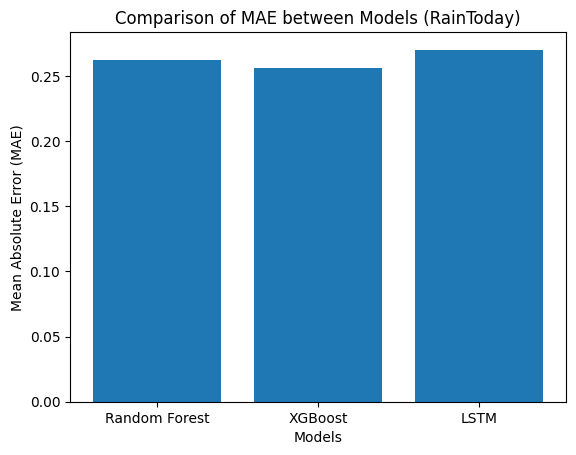

In [ ]:
# Create a list of model names
model_names = ['Random Forest', 'XGBoost', 'LSTM']

# Create a list of Mean Absolute Errors (MAE) for each model
mae_values = [mae_rf_rain_today, mae_xgb_rain_today, mae_lstm_rain_today]

# Plot the MAE values for each model
plt.bar(model_names, mae_values)
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of MAE between Models (RainToday)')
plt.show()

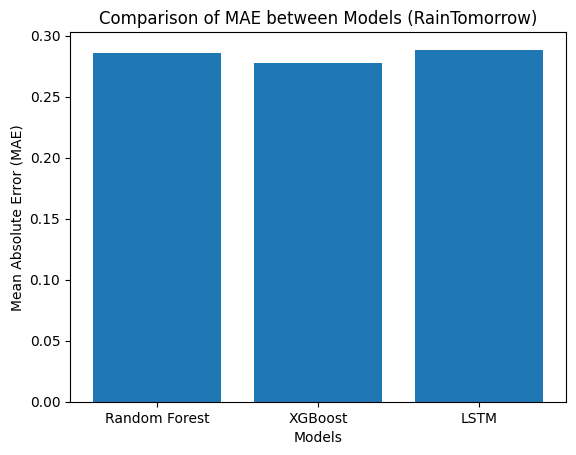

In [ ]:
# Create a list of Mean Absolute Errors (MAE) for each model
mae_values = [mae_rf_rain_tomorrow, mae_xgb_rain_tomorrow, mae_lstm_rain_tomorrow]

# Plot the MAE values for each model
plt.bar(model_names, mae_values)
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of MAE between Models (RainTomorrow)')
plt.show()

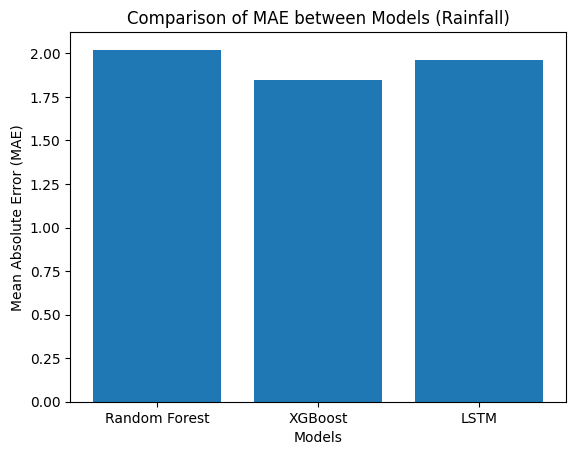

In [ ]:
# Create a list of Mean Absolute Errors (MAE) for each model
mae_values = [mae_rf_rainfall, mae_xgb_rainfall, mae_lstm_rainfall]

# Plot the MAE values for each model
plt.bar(model_names, mae_values)
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of MAE between Models (Rainfall)')
plt.show()

In [ ]:
location_mapping = {
    2: 'Albury',
    4: 'Badgerys Creek',
    10: 'Cobar',
    11: 'Coffs Harbour',
    21: 'Newcastle',
    24: 'Penrith',
    26: 'Richmond',
    27: 'Sydney',
    28: 'Sydney Airport',
    29: 'Wagga Wagga',
    30: 'Williamtown',
    31: 'Canberra',
    32: 'Tuggeranong',
    33: 'Mount Ginini',
    36: 'Ballarat',
    37: 'Bendigo',
    38: 'Sale',
    39: 'Melbourne Airport',
    40: 'Melbourne',
    41: 'Mildura',
    42: 'Nhill',
    43: 'Portland',
    44: 'Watsonia',
    45: 'Dartmoor',
    46: 'Brisbane',
    47: 'Cairns',
    48: 'Gold Coast',
    49: 'Townsville',
    50: 'Adelaide',
    51: 'Mount Gambier',
    52: 'Nuriootpa',
    53: 'Woomera',
    54: 'Albany',
    55: 'Witchcliffe',
    56: 'Pearce RAAF',
    57: 'Perth Airport',
    58: 'Perth',
    59: 'Salmon Gums',
    60: 'Walpole',
    61: 'Hobart',
    62: 'Launceston',
    63: 'Alice Springs',
    64: 'Darwin',
    65: 'Katherine',
    66: 'Uluru'
}

In [ ]:
import tensorflow as tf

# Enable eager execution
tf.config.run_functions_eagerly(True)


In [ ]:
# Create an empty DataFrame to store the predicted values
prediction_table = pd.DataFrame(columns=['City', 'Rain Today', 'Rain Tomorrow', 'Rainfall Today', 'Rainfall Tomorrow'])

threshold = 0.2

# Iterate over each unique city in the 'Location' column
for city in weather_df['Location'].unique():
    # Filter the data for the current city
    city_data = weather_df[weather_df['Location'] == city]
    
    # Extract the features (X) for the current city
    X_city = city_data.drop(['Rainfall', 'RainToday', 'RainTomorrow'], axis=1)
    
    # Predict Rain Today using the best predictive model
    y_pred_rain_today = best_model_rain_today.predict(X_city.iloc[0:1])
    rain_today_prediction = "Yes" if y_pred_rain_today >= threshold else "No"
    
    # Predict Rain Tomorrow using the best predictive model
    y_pred_rain_tomorrow = best_model_rain_tomorrow.predict(X_city.iloc[0:1])
    rain_tomorrow_prediction = "Yes" if y_pred_rain_tomorrow >= threshold else "No"
    
    # Predict Rainfall using the best predictive model
    y_pred_rainfall = best_model_rainfall.predict(X_city.iloc[0:1])
    
    # Create a DataFrame for the predictions
    city_predictions = pd.DataFrame({
        'City': [city],
        'Rain Today': [rain_today_prediction],
        'Rain Tomorrow': [rain_tomorrow_prediction],
        'Rainfall Today': [y_pred_rainfall[0]],
        'Rainfall Tomorrow': [y_pred_rainfall[0]]
    })
    
    # Concatenate the predictions with the main prediction table
    prediction_table = pd.concat([prediction_table, city_predictions], ignore_index=True)
prediction_table

,City,Rain Today,Rain Tomorrow,Rainfall Today,Rainfall Tomorrow
0,2,Yes,No,3.427834,3.427834
1,4,No,No,0.205619,0.205619
2,10,No,No,0.182554,0.182554
3,11,No,No,0.034965,0.034965
4,21,No,No,0.426785,0.426785
5,24,No,No,0.350917,0.350917
6,26,No,No,0.860189,0.860189
7,27,Yes,Yes,0.891709,0.891709
8,30,No,No,0.102772,0.102772
9,34,No,No,0.232773,0.232773


In [ ]:
prediction_table = prediction_table.dropna()
prediction_table

,City,Rain Today,Rain Tomorrow,Rainfall Today,Rainfall Tomorrow
0,2,Yes,No,3.427834,3.427834
1,4,No,No,0.205619,0.205619
2,10,No,No,0.182554,0.182554
3,11,No,No,0.034965,0.034965
4,21,No,No,0.426785,0.426785
5,24,No,No,0.350917,0.350917
6,26,No,No,0.860189,0.860189
7,27,Yes,Yes,0.891709,0.891709
8,30,No,No,0.102772,0.102772
9,34,No,No,0.232773,0.232773


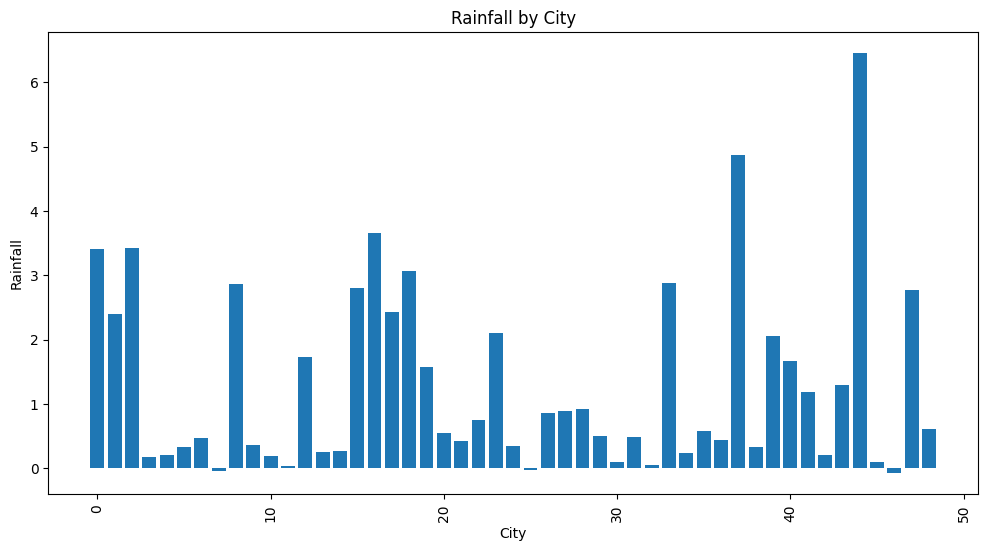

In [ ]:
# Calculate the average of 'Rainfall Today' and 'Rainfall Tomorrow'
prediction_table['Rainfall'] = (prediction_table['Rainfall Today'] + prediction_table['Rainfall Tomorrow']) / 2

# Create a bar plot
plt.figure(figsize=(12, 6))  # Set the figure size

plt.bar(prediction_table['City'], prediction_table['Rainfall'])  # Plot the bars
plt.xlabel('City')  # Set the x-axis label
plt.ylabel('Rainfall')  # Set the y-axis label
plt.title('Rainfall by City')  # Set the title of the plot

plt.xticks(rotation=90)  # Rotate the x-axis labels if needed

plt.show()  # Display the plot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


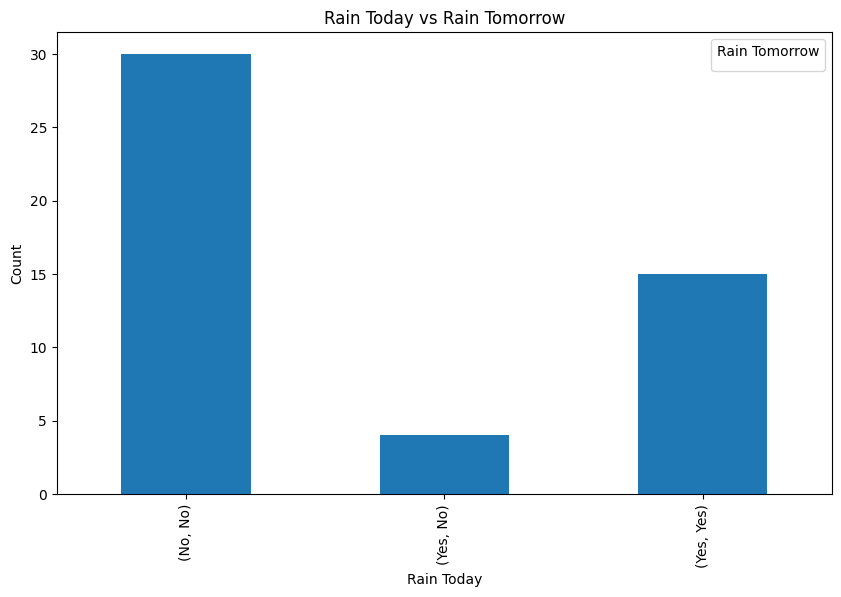

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the occurrences of each combination of "Rain Today" and "Rain Tomorrow"
rain_counts = prediction_table.groupby(['Rain Today', 'Rain Tomorrow']).size()

# Create a bar plot
rain_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Rain Today')
plt.ylabel('Count')
plt.title('Rain Today vs Rain Tomorrow')
plt.legend(title='Rain Tomorrow')
plt.show()

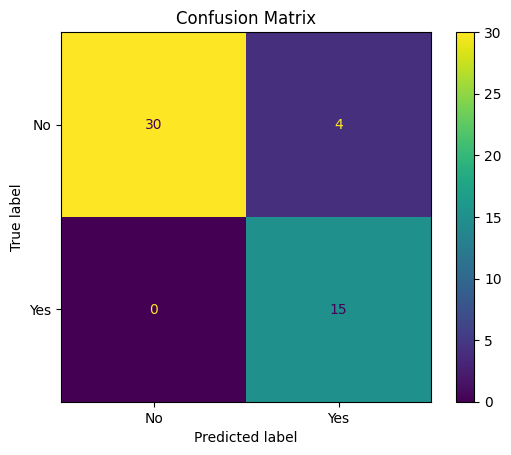

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

# Assuming 'predictions_table' contains your predicted and actual values
actual = prediction_table['Rain Tomorrow'].map({'No': False, 'Yes': True})
predicted = prediction_table['Rain Today'].map({'No': False, 'Yes': True})

# Calculate the confusion matrix
confusion_matrix = metrics.confusion_matrix(actual, predicted)

# Create a ConfusionMatrixDisplay object
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=['No', 'Yes'])

# Plot the confusion matrix
cm_display.plot()
plt.title('Confusion Matrix')
plt.show()

now we can use the models in another preprocessed data and get its value